In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [43]:
css()

In [2]:
code_toggle()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
update('collocations')

Updated file `D:\Documents\notebøker\collocations.py`

In [5]:
from collocations import make_collocations, collocation, colls2df, urn_coll

In [6]:
import pandas as pd

In [7]:
import ast

In [8]:
colls_before = pd.read_json('demokrati_before.json')

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [11]:
#colls_after = pd.read_json('demokrati_after.json')

In [12]:
#colls_before.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_before.columns))

In [13]:
#colls_after.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_after.columns))

In [14]:
#show = lambda res, col, axis=1: res.sort_values(by=col, ascending=False).head(20).fillna(0).style.background_gradient(axis=axis)

In [15]:
demokrati = nb.make_graph('demokrati', cutoff=16)

# NB-digital 

# DH-lab

https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

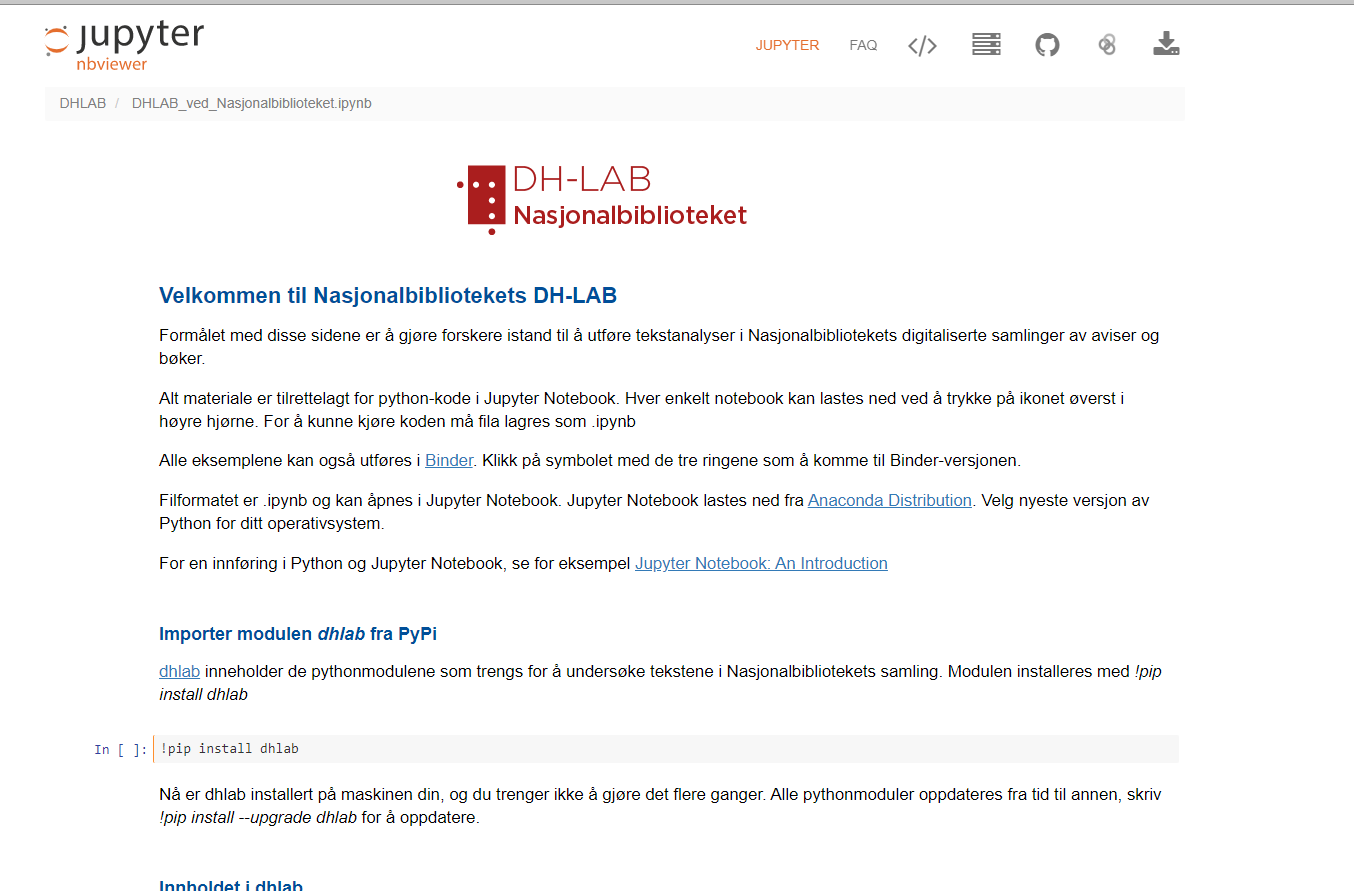

<br/>
<br/>
<br/>

# Ordet *demokrati*

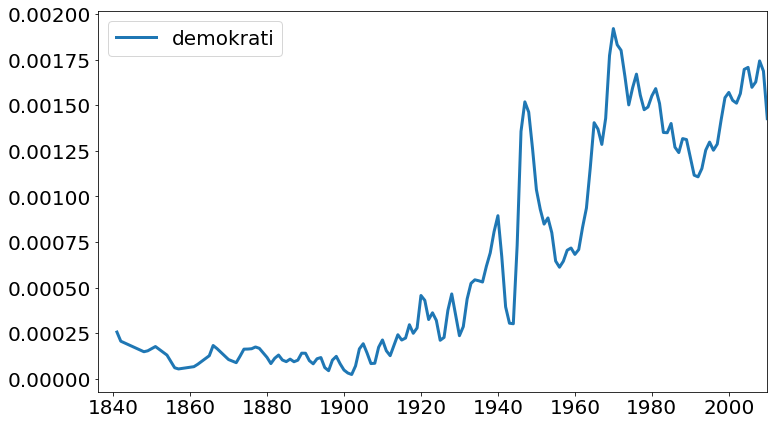

In [16]:
nb.nb_ngram('demokrati').plot(lw=3, figsize=(12,7));

<br>
<br>
<br>
<br>


# Flere ord







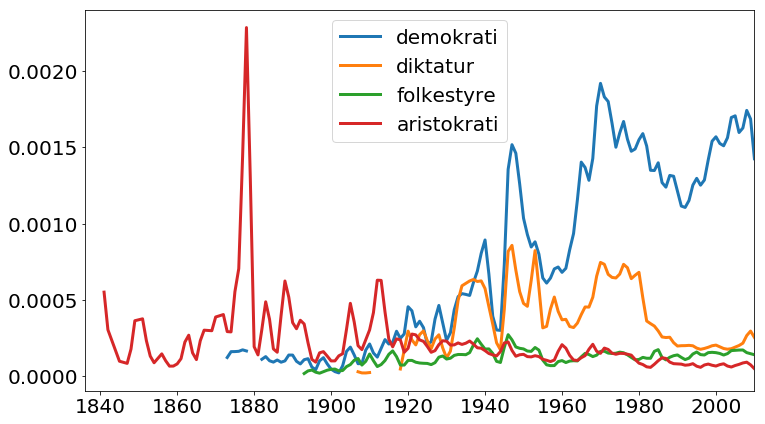

In [17]:
nb.nb_ngram('demokrati, diktatur, folkestyre, aristokrati').plot(lw=3, figsize=(12,7));

<br>
<br>
<br>
<br>

# En graf

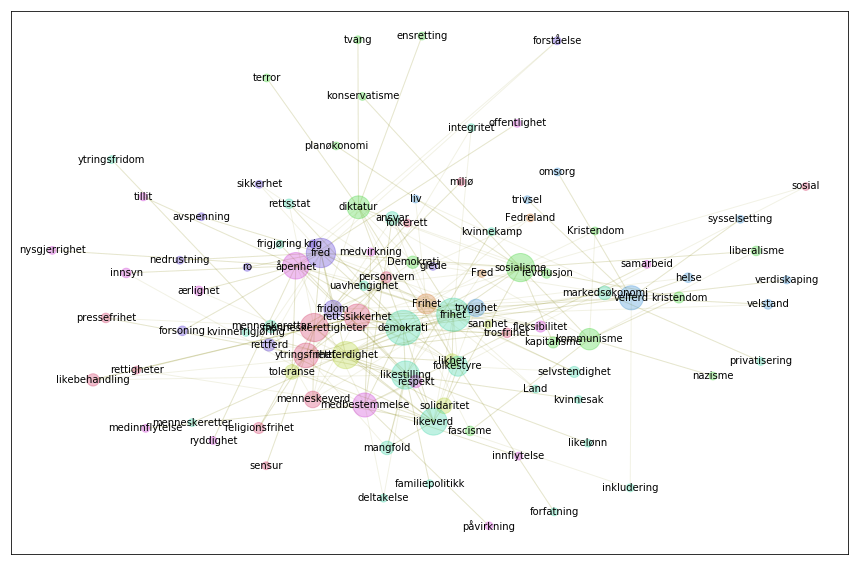

In [18]:
gnl.show_graph(demokrati, spread = 1.8);

In [19]:
gnl.show_communities(demokrati)

rettferdighet-solidaritet :  rettferdighet, solidaritet, likhet, toleranse, sannhet

sosialisme-diktatur :  sosialisme, diktatur, kommunisme, Demokrati, kristendom, kapitalisme, fascisme, revolusjon, liberalisme, terror, tvang, planøkonomi, ensretting, Kristendom, nazisme, konservatisme

demokrati-frihet :  demokrati, frihet, likestilling, likeverd, folkestyre, markedsøkonomi, mangfold, ansvar, menneskerettar, selvstendighet, uavhengighet, rettsstat, menneskeretter, familiepolitikk, kvinnekamp, kvinnesak, kvinnefrigjøring, deltakelse, inkludering, integritet, frigjøring, Land, forfatning, ytringsfridom, privatisering, likelønn

velferd-trygghet :  velferd, trygghet, velstand, helse, trivsel, verdiskaping, omsorg, sysselsetting, liv

fred-fridom :  fred, fridom, rettferd, forsoning, krig, glede, ro, avspenning, nedrustning, forståelse, sikkerhet

åpenhet-medbestemmelse :  åpenhet, medbestemmelse, respekt, fleksibilitet, ærlighet, innsyn, medinnflytelse, påvirkning, offentlighet, ryddigh

In [20]:
demokrati_dict = gnl.community_dict(demokrati)

<br>
<br>
<br>

# Studerer endring gjennom kollokasjoner
<br>
` nb.collocation('demokrati', yearfrom=1950, yearto=1955, before=10, after=10, corpus='avis')`

# Sammenligner med en referanse


<br>

<span style="font-size:150%">`tot = nb.frame(nb.totals(50000), 'tot')`</span>

In [21]:
tot = nb.frame(nb.totals(50000), 'tot')

In [22]:
#colls = pd.concat([nb.frame(coll[d], d) for d in coll], axis=1, sort=False).fillna(0)

In [23]:
#colls.to_json('demokrati_collocations.json')

In [24]:
colls = pd.read_json('demokrati_collocations.json')

In [25]:
agg = pd.DataFrame()
step = 5
for i in range(0, len(colls.columns), step):
    agg[colls.columns[i]] = colls[colls.columns[i:i+step]].sum(axis=1)

In [26]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]/tot.tot

In [27]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for 1965

In [28]:
pmi.sort_values(by=1965, ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
industrielt,0.0141323,0.00244299,0.0369976,0.0116689,0.000364157,8.81641e-05
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
sosialisme,0.00268965,0.00808811,0.00737364,0.0102617,0.00347929,0.00193598
parlamentarisk,0.00461876,0.00139324,0.00321979,0.00589375,0.00448428,0.00388101
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475
Demokrati,0.00185841,0.00360669,0.00233054,0.00457253,0.00378791,0.00469513
arbeidsplassen,3.07853e-05,5.73565e-05,0.00281672,0.0044361,0.000351757,0.000130404
sosialistisk,0.00137329,0.00221746,0.00201335,0.00433125,0.00176529,0.000753463
parlamentariske,0.0080445,0.0021649,0.00322016,0.00410196,0.00175338,0.00160644
levedyktig,0.000275952,0.00531267,0.00323356,0.0037273,0.00249618,0.00166987


In [29]:
pmi.sort_values(by=1935, ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
kommunisme,0.00130812,0.00812394,0.00724425,0.00339172,0.00241329,0.00246976
sosialisme,0.00268965,0.00808811,0.00737364,0.0102617,0.00347929,0.00193598
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475
levedyktig,0.000275952,0.00531267,0.00323356,0.0037273,0.00249618,0.00166987
demokratiet,0.00377596,0.00507445,0.00302559,0.00357549,0.00265602,0.00265205
liberalisme,0.0051254,0.00503985,0.0014192,0.000591404,0.000854051,0.000527263
demokratiets,0.0047873,0.00478999,0.00277496,0.003123,0.00161442,0.00131972
Sovjet-Samveldet,0.000247471,0.00420082,0.00131088,8.3985e-05,0,0
Demokrati,0.00185841,0.00360669,0.00233054,0.00457253,0.00378791,0.00469513


<br>
<br>

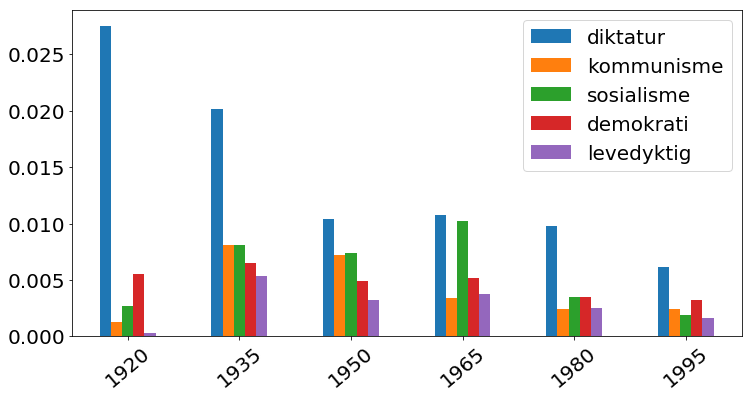

In [30]:
pmi.sort_values(by=1935, ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=40, figsize=(12, 6));

<br>
<br>
<br>
<br>

# De hundre toppordene for 1965 sortert på ordklasser

In [31]:
mdprint(pmi.sort_values(by=1965, ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Demokrati, Hellas, NTB, Bratteli, Arbeiderpartiets, Venstres, EEC, Borten, Arbeiderpartiet, 19.00, Portugal, Høyres, Willoch, Sosialistisk, Tsjekkoslovakia, Landsorganisasjonen, Nordli, Vårt, Statsminister, 20.00, Spanias, Gustavsen</span>

## adj
<span style='font-size:1.5em'>industrielt, parlamentarisk, sosialistisk, parlamentariske, levedyktig, liberalt, sosialistiske, reelt, folkevalgte, vestlig, demokratiske, portugisiske, demokratisk, totalitære, forenlig, uforenlig, uverdig, sunt, representative</span>
## subst
<span style='font-size:1.5em'>diktatur, sosialisme, demokrati, demokratiet, kommunisme, styreform, hverdagen, rettssikkerhet, ytringsfrihet, spilleregler, styresett, fagbevegelsen, trusel, byråkrati, velgerne, menneskeverd, sosialismen, arbeidslivet, frihet, solidaritet, fridom, folkeavstemning, menneskerettigheter, likestilling, slagord, humanisme, parodi, slagordet, valgkampen, kapitalisme, arbeiderbevegelse, komité, toleranse, medansvar, rettferd, suverenitet, arbeiderbevegelsen, uavhengighet, sosialister</span>
## unknown
<span style='font-size:1.5em'>arbeidsplassen, demokratiets, proletariatets, demokratisering, kvardagen, desentralisering, arbeidsplassene, onsker, komite, medbestemmelse, arbeiderbevegelsens, folkenes, samfunnslivet, stotte, flertallets, språkleg</span>
## verb
<span style='font-size:1.5em'>undergrave, praktiserer, framholdt</span>
## det
<span style='font-size:1.5em'>vårt</span>


# Hvordan utvikler ordene seg?

In [45]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=40, figsize=(12,6)) ;

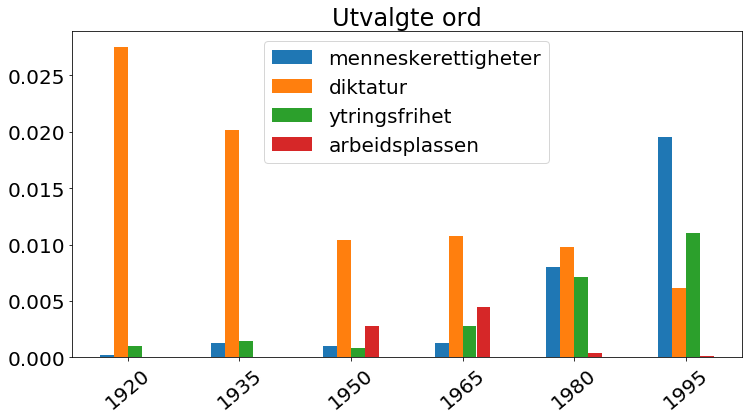

In [47]:
barchart(['menneskerettigheter','diktatur',"ytringsfrihet", 'arbeidsplassen'], 'Utvalgte ord');

<br>
<br>

# Sjekk ut vanlige ord

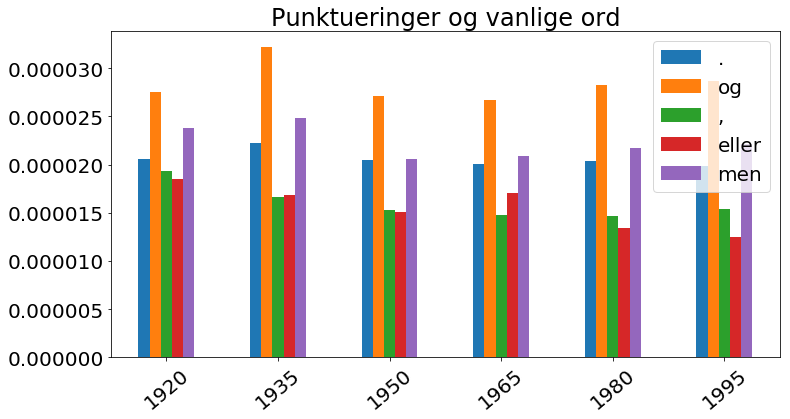

In [48]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord');

<br>
<br>

# De fremste blandt temaene

In [44]:
pos=""
for x in demokrati_dict:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(demokrati_dict[x][:5]) ) + "\n"
mu.printmd(pos)

### rettferdighet-solidaritet
<span style='font-size:1.5em'>rettferdighet, solidaritet, likhet, toleranse, sannhet</span>
### sosialisme-diktatur
<span style='font-size:1.5em'>sosialisme, diktatur, kommunisme, Demokrati, kristendom</span>
### demokrati-frihet
<span style='font-size:1.5em'>demokrati, frihet, likestilling, likeverd, folkestyre</span>
### velferd-trygghet
<span style='font-size:1.5em'>velferd, trygghet, velstand, helse, trivsel</span>
### fred-fridom
<span style='font-size:1.5em'>fred, fridom, rettferd, forsoning, krig</span>
### åpenhet-medbestemmelse
<span style='font-size:1.5em'>åpenhet, medbestemmelse, respekt, fleksibilitet, ærlighet</span>
### menneskerettigheter-rettssikkerhet
<span style='font-size:1.5em'>menneskerettigheter, rettssikkerhet, ytringsfrihet, menneskeverd, likebehandling</span>
### Frihet-Fred
<span style='font-size:1.5em'>Frihet, Fred, Fedreland</span>


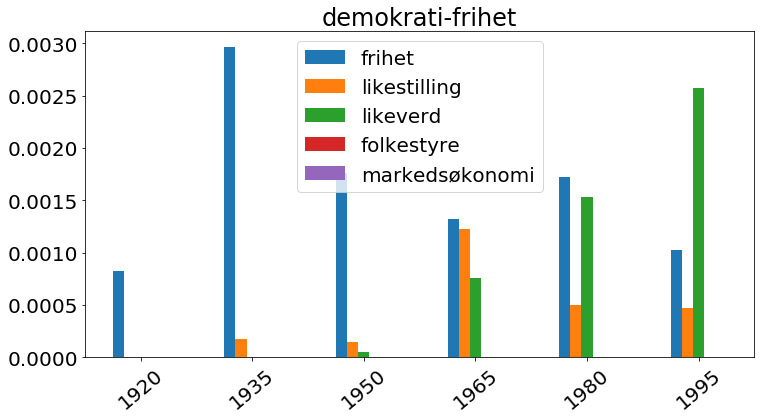

In [49]:
barchart(demokrati_dict['demokrati-frihet'][1:6], 'demokrati-frihet');

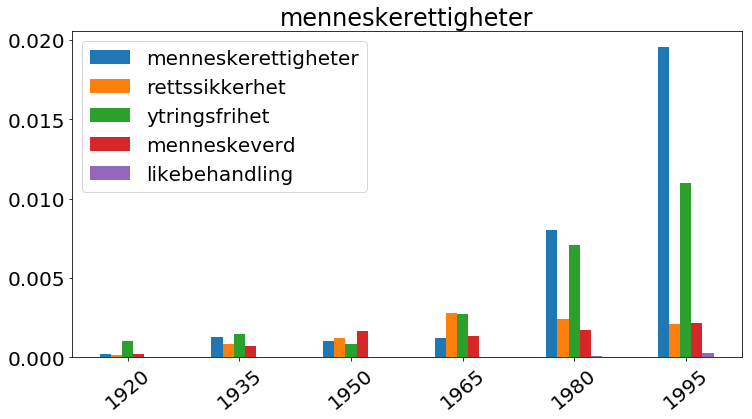

In [50]:
barchart(demokrati_dict['menneskerettigheter-rettssikkerhet'][0:5], 'menneskerettigheter');

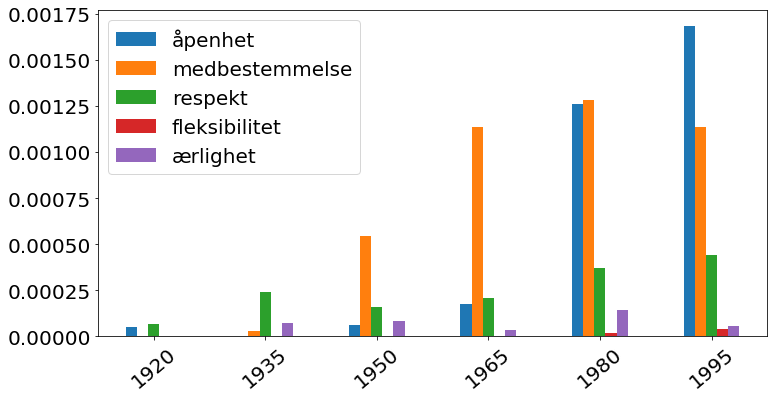

In [38]:
barchart(demokrati_dict['åpenhet-medbestemmelse'][0:5]);